In [17]:
from sklearn.datasets import load_iris
import numpy as np
from sklearn.model_selection import train_test_split
iris = load_iris()
X = iris.data
y = iris.target
















In [18]:
os.getcwd()

'C:\\Users\\16475'

In [19]:
# split into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)


In [20]:
# loading library
from sklearn.neighbors import KNeighborsClassifier

# instantiate learning model (k = 3)
knn = KNeighborsClassifier(n_neighbors=3)

# fitting the model
knn.fit(X_train, y_train)

# predict the response
pred = knn.predict(X_test)

# evaluate accuracy
from sklearn.metrics import accuracy_score
print (accuracy_score(y_test, pred))


0.98


In [21]:

# creating odd list of K for KNN
myList = list(range(1,50))
from sklearn.model_selection import cross_val_score
# subsetting just the odd ones
neighbors = [x for x in myList if x%2 !=0]

# empty list that will hold cv scores
cv_scores = []

# perform 10-fold cross validation
for k in neighbors:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train, y_train, cv=10, scoring='accuracy')
    cv_scores.append(scores.mean())



The optimal number of neighbors is 1


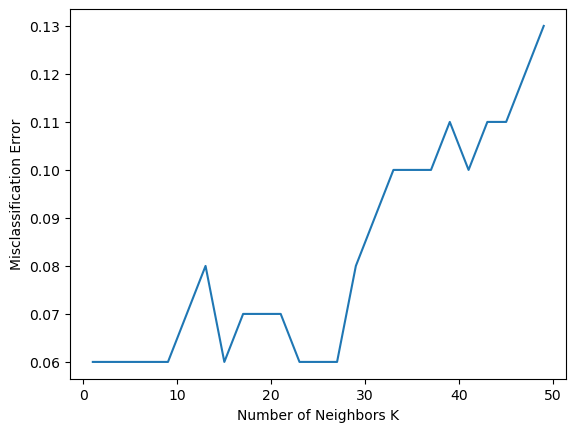

In [22]:
# changing to misclassification error
import matplotlib.pyplot as plt
MSE = [1 - x for x in cv_scores]
# determining best k
optimal_k = neighbors[MSE.index(min(MSE))]
print ("The optimal number of neighbors is %d" % optimal_k)
# plot misclassification error vs k
plt.plot(neighbors, MSE)
plt.xlabel('Number of Neighbors K')
plt.ylabel('Misclassification Error')
plt.show()
